In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [ ]:
def load_dataset(path):
    df = pd.read_csv(path, index_col=0)
    return df

In [ ]:
movies_df = load_dataset('drive/MyDrive/IAS/Semester3/NLP/data/all_movies.csv')
movies_df.head()

,movie_name,index,utterance,count_utterances,tag
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism
2,12 Angry Men,2,Shh. Shh.,2065,racism
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism


In [ ]:
annotations_LSTM_fox_news_df = load_dataset('drive/MyDrive/IAS/Semester3/NLP/annotations/annotations_LSTM_FoxNews.csv')
annotations_LSTM_fox_news_df.rename(columns={'label': 'label_fox_news'}, inplace=True)
annotations_LSTM_fox_news_df

,movie_name,index,label_fox_news
0,A Time to Kill,0,not hate speech
1,A Time to Kill,1,not hate speech
2,A Time to Kill,2,not hate speech
3,A Time to Kill,3,not hate speech
4,A Time to Kill,4,not hate speech
...,...,...,...
359031,Wind River,1264,not hate speech
359032,Wind River,1265,not hate speech
359033,Wind River,1266,not hate speech
359034,Wind River,1267,hate speech


In [ ]:
annotations_LSTM_twitter_df = load_dataset('drive/MyDrive/IAS/Semester3/NLP/annotations/annotations_LSTM_twitter.csv')
annotations_LSTM_twitter_df.rename(columns={'label': 'label_twitter'}, inplace=True)
annotations_LSTM_twitter_df

,movie_name,index,label_twitter
0,Falling Down,0,offensive language
1,Falling Down,1,offensive language
2,Falling Down,2,offensive language
3,Falling Down,3,neither
4,Falling Down,4,offensive language
...,...,...,...
359031,The Social Network,2405,offensive language
359032,The Social Network,2406,offensive language
359033,The Social Network,2407,offensive language
359034,The Social Network,2408,neither


# Joining Datasets

In [ ]:
df_results = movies_df.merge(annotations_LSTM_fox_news_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_LSTM_twitter_df, on=['index', 'movie_name'])

In [ ]:
df_results.head()

,movie_name,index,utterance,count_utterances,tag,label_fox_news,label_twitter
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,offensive language
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,neither
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,offensive language
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,not hate speech,offensive language


## Analyse Results

In [ ]:
def plot_label_by_tag_distribution(df, title, label):
    df = df_results.groupby('tag')[label].value_counts().to_frame('count').reset_index()
    df_pivot = pd.pivot_table(
        df,
        values="count",
        index="tag",
        columns=label
    )
    ax = df_pivot.plot(kind='bar', title=title)
    return ax

In [ ]:
def plot_label_by_tag_distribution_percentage(df, title, label):
    ax = df_results.groupby('tag')[label].value_counts(normalize=True).unstack().plot(kind='bar', stacked = True, title=title)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        a = round(x + width/2, 2)
        b = round(y + height*1.00, 2)
        height = round(height, 2)
        ax.annotate(f'{height}', (a, b), ha='center')
    ax.legend(bbox_to_anchor=(1.5, 1))
    return ax

# Word embedding

## Fox News

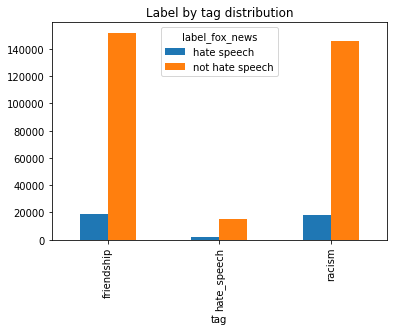

In [ ]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='label_fox_news')

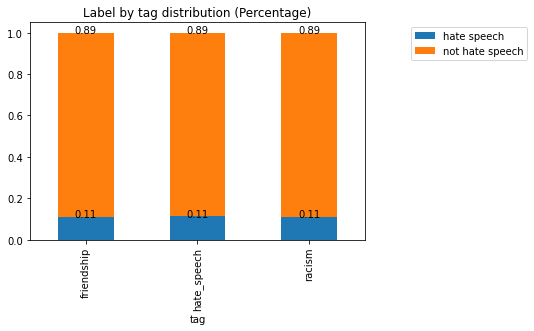

In [ ]:
plot_label_by_tag_distribution_percentage(df_results, title='Label by tag distribution (Percentage)', label='label_fox_news')

## hate speech examples

In [ ]:
hatespeech_sentences = df_results[df_results.label_fox_news=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

If there's a reasonable doubt in your minds as to the guilt of the accused...
---
Now, if there's anything you want, I'll be right outside the door.
---
Sure they lock the door.
---
Oh, I thought we might want to vote by ballot.
---
It was pretty interesting.
---
What gets me is the way those lawyers talk and talk and talk...
---
Well, I guess they're entitled.
---
 We probably all got things to do here.
---
I mean, it had a lot of interest for me.
---
I figured us for an assault or burglary.
---
Well, I expected that.
---
Got 37 men working.
---
You're a real baseball fan, aren't you?
---
One, two, three, four, five  so on, around the table.
---
If that's okay with you gentlemen.
---
 We start with you. One, right?
---
 One, yeah. Two, three, four, five, six.
---
Okay. Two. You're two.
---
I thought he was really sharp, the way he handled all those points one by one.
---
Oh, forgive me, gentlemen.
---
Uh, we can, well, discuss it first and, uh, then vote on it.
---
I think it's custom

# Word embedding

## Twitter

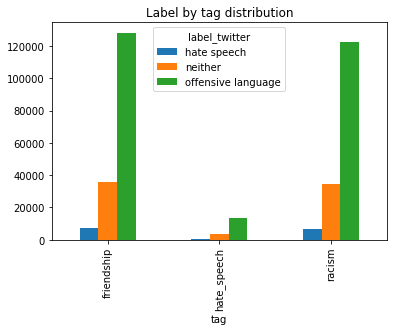

In [ ]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='label_twitter')

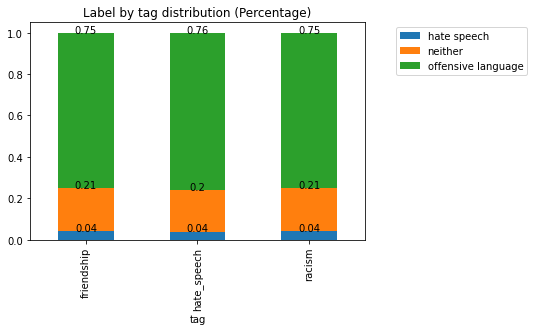

In [ ]:
plot_label_by_tag_distribution_percentage(df_results, title='Label by tag distribution (Percentage)', label='label_twitter')

In [ ]:
hatespeech_sentences = df_results[df_results.label_twitter=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

Thank you very much, sir.
---
Hey. Oh, oh.
---
 No, thanks.
---
 Come on, I'll give you a hand.
---
That's it.
---
Hey.
---
 Sure.
---
 Sure.
---
Gentleman at the window.
---
Look, what's the difference how long it takes?
---
That's not why we're sitting here.
---
What are we sitting here for?
---
 Only an ignorant man can believe that.
---
Do you think you were born with a monopoly on the truth?
---
Well, uh...
---
At 10 minutes after 12:00 on the night of the killing...
---
She's dying with the heat.
---
Then they heard the father hit the boy twice.
---
Well, it don't exactly prove anything.
---
I think we're missing the point here.
---
Let's go.
---
 Where'd you get that?
---
Well, that's it.
---
I did.
---
Some account exec will get up, and he'll say, uh...
---
Uh...
---
Uh...
---
 Okay, go.
---
She said she saw the killing through the windows of a moving elevated train.
---
 Hey.
---
Oh, brother. Don't matter though.
---
I think I know this man better than anyone here.
---
No. He 

## Intersections

### both are "hate speech"

In [ ]:
df_intersections = df_results[(df_results.label_twitter=='hate speech')&(df_results.label_fox_news=='hate speech')]

In [ ]:
df_intersections

,movie_name,index,utterance,count_utterances,tag,label_fox_news,label_twitter
274,12 Angry Men,274,What are we sitting here for?,2065,racism,hate speech,hate speech
509,12 Angry Men,509,Let's go.,2065,racism,hate speech,hate speech
884,12 Angry Men,884,"Okay, go.",2065,racism,hate speech,hate speech
1647,12 Angry Men,1647,Who's got a suggestion?,2065,racism,hate speech,hate speech
1961,12 Angry Men,1961,"From glasses, right?",2065,racism,hate speech,hate speech
...,...,...,...,...,...,...,...
349812,Wind River,751,They were best friends.,1269,friendship,hate speech,hate speech
349970,Wind River,909,"Dillon, holster your weapon.",1269,friendship,hate speech,hate speech
350042,Wind River,981,I remember thinking they were all like they ha...,1269,friendship,hate speech,hate speech
350044,Wind River,983,Like they've all figured it out.,1269,friendship,hate speech,hate speech


### fox news is "hate speech" and twitter is "offensive language"

In [ ]:
df_intersections = df_results[(df_results.label_twitter=='offensive language')&(df_results.label_fox_news=='hate speech')]

In [ ]:
df_intersections

,movie_name,index,utterance,count_utterances,tag,label_fox_news,label_twitter
14,12 Angry Men,14,If there's a reasonable doubt in your minds as...,2065,racism,hate speech,offensive language
58,12 Angry Men,58,"Oh, I thought we might want to vote by ballot.",2065,racism,hate speech,offensive language
63,12 Angry Men,63,It was pretty interesting.,2065,racism,hate speech,offensive language
67,12 Angry Men,67,What gets me is the way those lawyers talk and...,2065,racism,hate speech,offensive language
78,12 Angry Men,78,We probably all got things to do here.,2065,racism,hate speech,offensive language
...,...,...,...,...,...,...,...
352053,You,1723,It's time to go to bed and let these two young...,1772,friendship,hate speech,offensive language
352054,You,1724,Yes it's our bedtime so Aw Y'all be good.,1772,friendship,hate speech,offensive language
352068,You,1738,What did you and momma talk about No no it's...,1772,friendship,hate speech,offensive language
352096,You,1766,I would say the inspiration for this song was...,1772,friendship,hate speech,offensive language
